<a href="https://colab.research.google.com/github/ss1705/pytorch-exp/blob/main/PyTorch_1_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow
1. Get data ready
2. Build a model
3. Fit the model to data (training)
4. Make predictions and evaluate a model (inference)
5. Save and load a model
6. Put it all together

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.9.0+cpu'

## Data

ML - turn data into numbers + pick/build a model to learn the representation as best as possible

Creating data example:
- create data as a straight line
- linear regression to create data with known parameters
- use PyTorch to build model to estimate parameters using GD

In [13]:
weight = 0.7
bias = 0.3
#known params

In [14]:
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [15]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Split data into training and test sets
- done before building the model
- validation set also created sometimes

In [16]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [17]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [18]:
X_train.shape, X_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [21]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

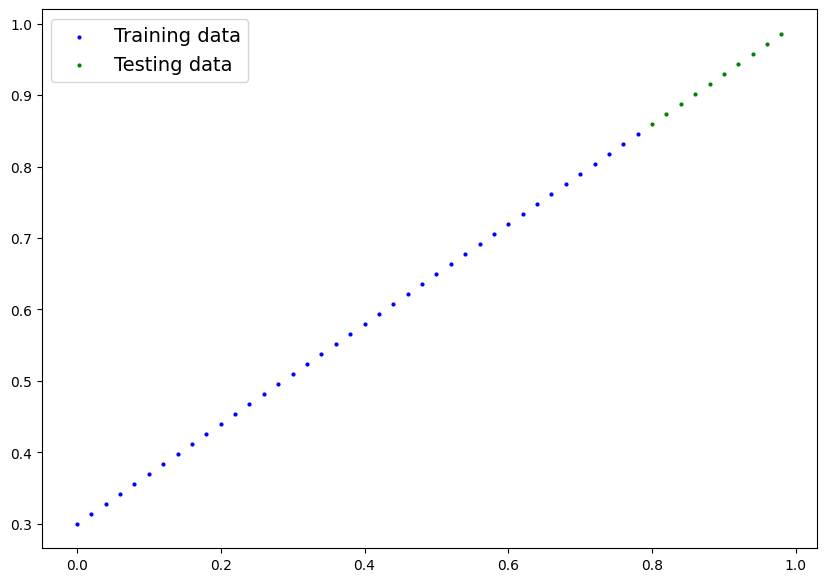

In [ ]:
plot_predictions();

## Build model

In [3]:
class LinearRegressionModel(nn.Module): #almost everything in PT is a nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #starting with random weights, gets adjusted as the model learns
                                            dtype=torch.float), #float32 by default
                                requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float),
                             requires_grad=True)

  def forward(self, x:torch.Tensor) -> torch.Tensor: #defines computation in the model, x is input data (train/test features)
    return self.weights * x + self.bias #linear regression formula

### Python Class Recap:
- to bundle properties and behaviors into individual objects (OOP)
- four tenants of OOP: encapsulation, inheritance, abstraction, polymorphism
- `__init__()`: sets initial state of object by assigning values of the object's properties
- attributes created in init are instance attributes
- class attributes are attributes that have the same value for all class instances
- instance methods - functions defined inside a class, can only call on an instance of that class
- self as first parameter in everything
- dunder methods - methods beginning and ending with double underscores [`__init__()`,`__str__()`,`__repr__()`]
- `__str__()`: provides informal string representation of an object
- `__repr__()`: returns formal string representation of an object, must return a string that allows you to recreate the object if possible

#### Inheritance:
- create a new class and pass the name of the parent class as parameter
eg: `class Child(Parent)`
- child classes take on attributes and methods of parent classes
- all objects created from a child class are instances of the parent class, although they may not be instances of other child classes
- changes to the parent class automatically propagate to child classes

## PyTorch Model Building Essentials
- `torch.nn`: contains all building blocks for computational graphs
- `torch.nn.Parameter`: stores tensors that can be used with nn.Module, if `requires_grad=True`, gradients are calculated automatically [autograd]
- `torch.nn.Module` - base class for all neural network modules, all building blocks are subclasses, requires `forward()` method to be implemented
- `torch.optim`: contains optimization algorithms - tell the model params how to best change to improve GD and reduce loss
- `def forward()` - all nn.Module subclasses require a `forward()` method, defines computation that will take place on the data passed

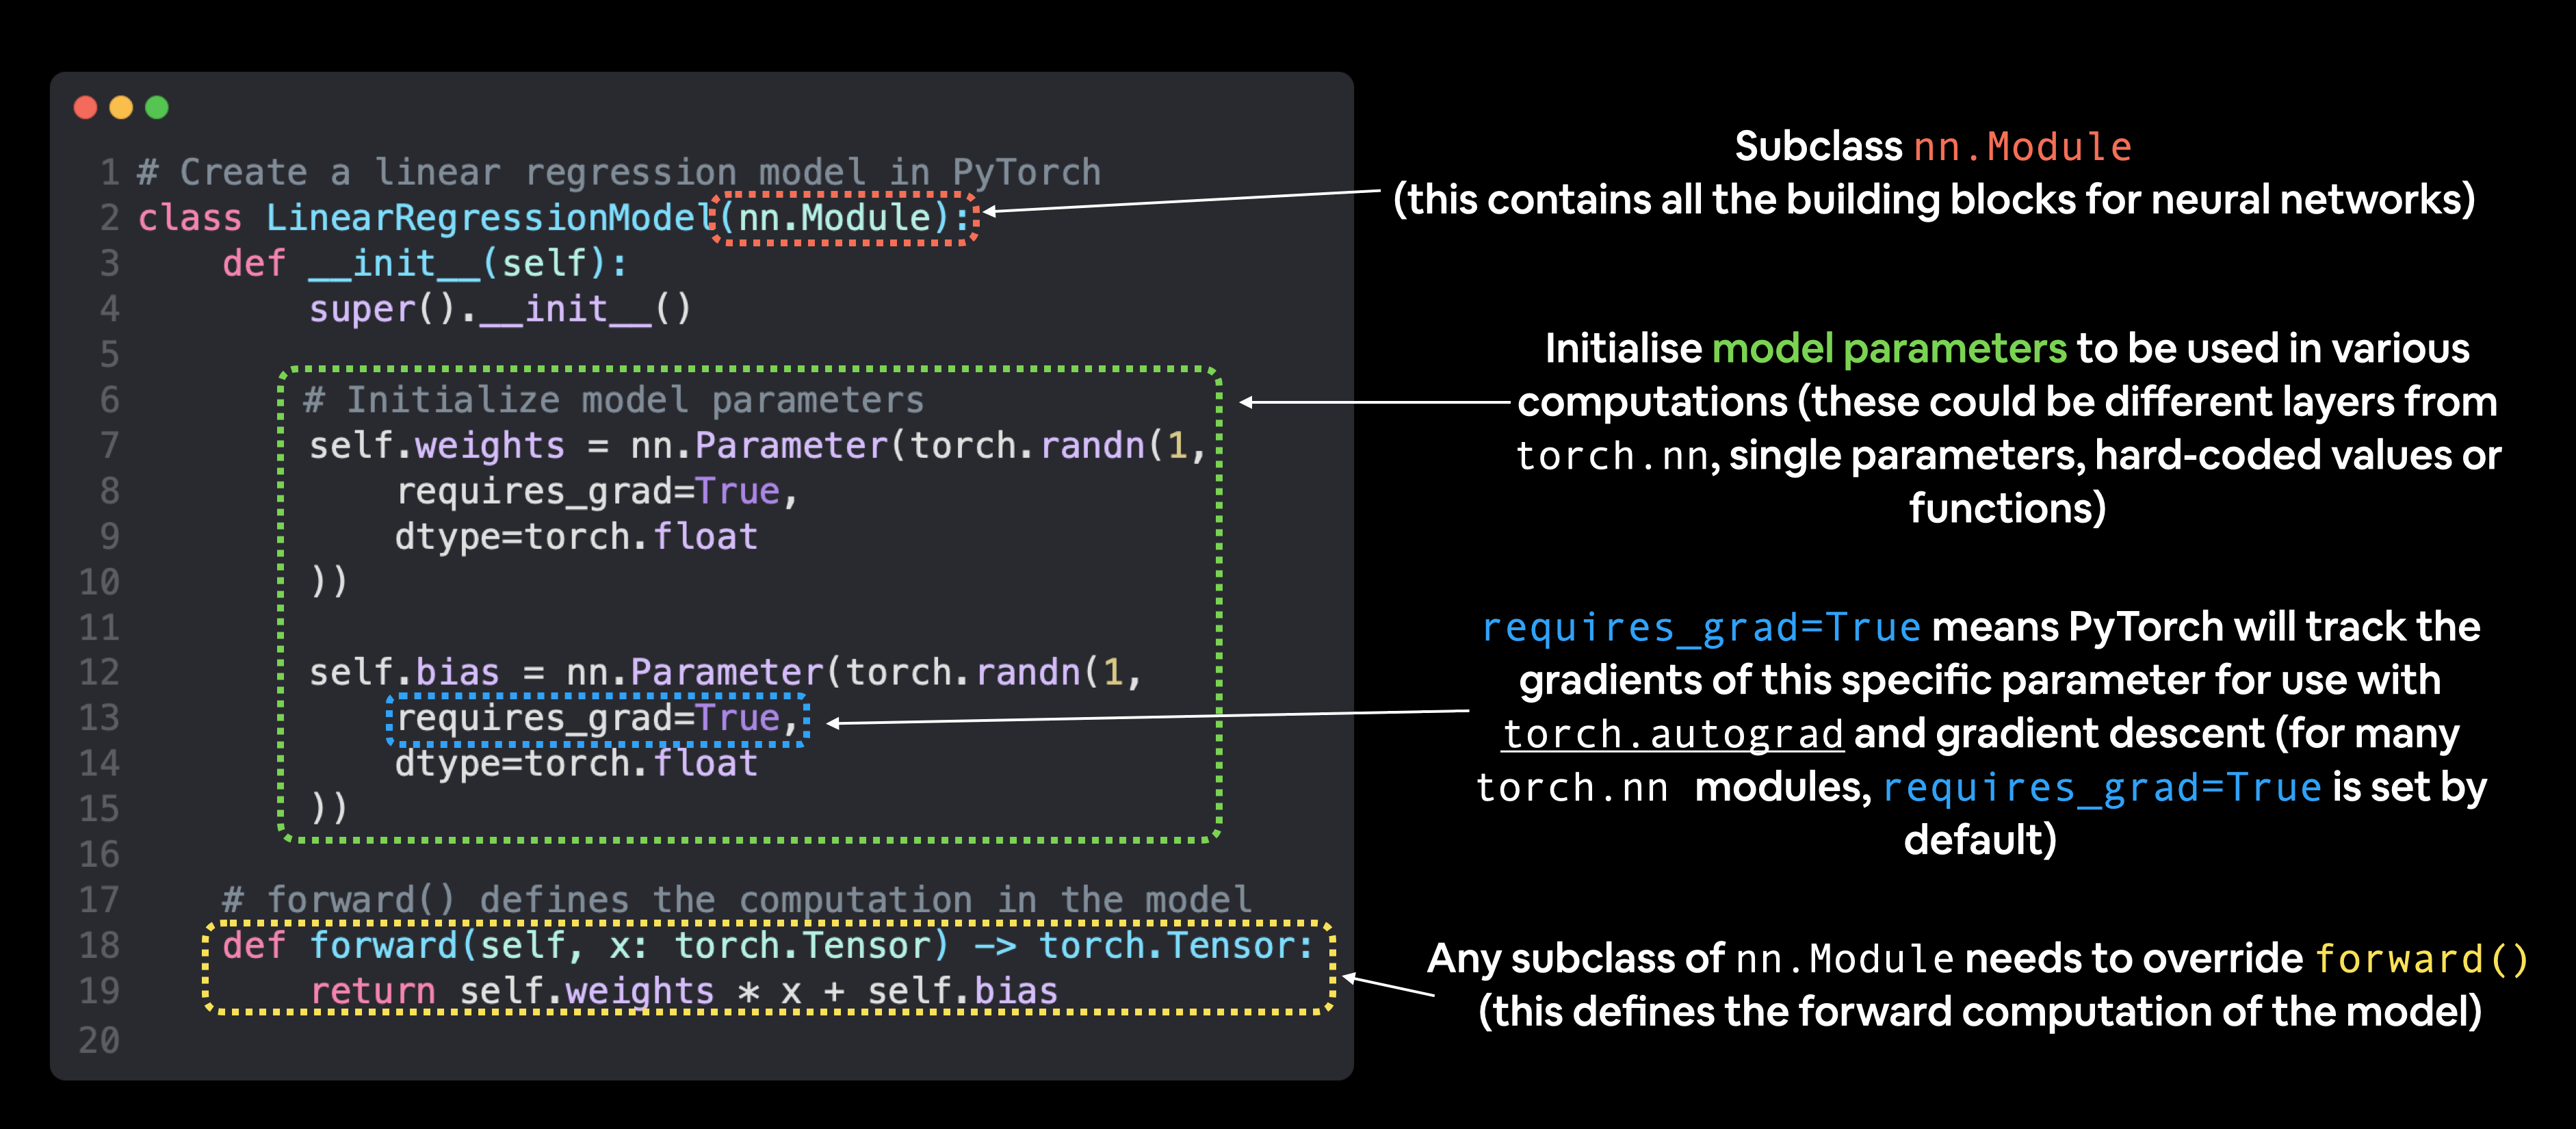

In [10]:
torch.manual_seed(17)
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([-1.4135], requires_grad=True),
 Parameter containing:
 tensor([0.2336], requires_grad=True)]

In [11]:
model0.state_dict()

OrderedDict([('weights', tensor([-1.4135])), ('bias', tensor([0.2336]))])

values for weights and bias are random float rensors since we initialized them with torch.randn()

we want to start from random params and get the model to update them towards params that fit our data best (eg: weight and bias values)

### Making predictions with `torch.inference_mode()`
- `torch.inference_mode()` is used as a context manager
- used when using a model for inference, i.e, to make predictions
- it turns off a bunch of things to make forward-passes faster
- no gradient tracking since it is necessary for training but not inference

In [19]:
with torch.inference_mode():
  y_preds = model0(X_test)

In [20]:
print(f"Number of testing samples:{len(X_test)}")
print(f"Number of predictions made:{len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples:10
Number of predictions made:10
Predicted values:
tensor([[-0.8972],
        [-0.9254],
        [-0.9537],
        [-0.9820],
        [-1.0103],
        [-1.0385],
        [-1.0668],
        [-1.0951],
        [-1.1233],
        [-1.1516]])


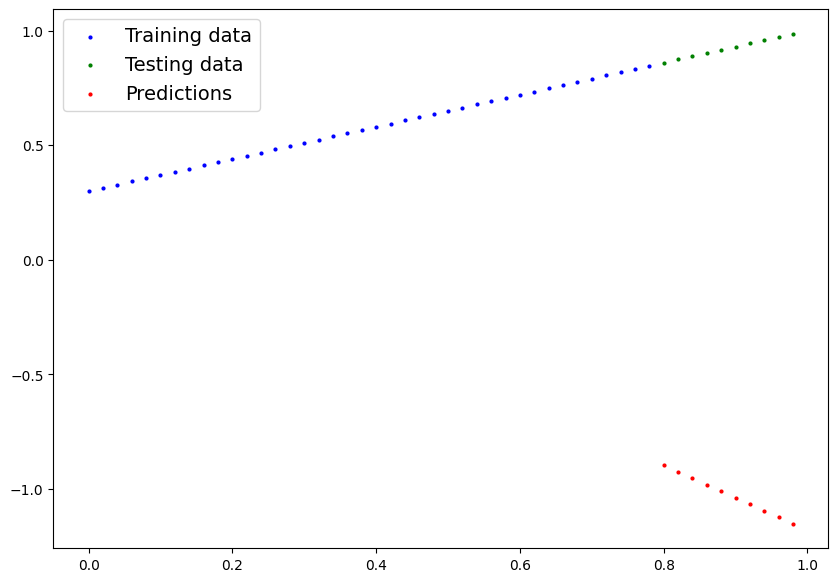

In [24]:
plot_predictions(predictions=y_preds)

In [25]:
y_test - y_preds

tensor([[1.7572],
        [1.7994],
        [1.8417],
        [1.8840],
        [1.9263],
        [1.9685],
        [2.0108],
        [2.0531],
        [2.0953],
        [2.1376]])

### Train the model
- update internal parameters - weights and bias values - to be something that better represents the data
- to update parameters on its own, we add: loss function + optimizer

#### Loss function:
- measures how wrong model's predictions are compared to truth labels
built-in loss functions available in torch.nn
- common values: MAE for regression problems [`torch.nn.L1Loss()`], binary cross entropy for binary classification problems [`torch.nn.BCELoss()`]

#### Optimizer:
- tells your model how to update its internal params to best lower the loss
- various optimization function implementations in torch.optim
- common values: stochastic gradient descent [`torch.optim.SGD()`], adam optimizer [`torch.optim.Adam()`]

In [26]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)

### Optimization loop = training and testing
- training loop: model goes through training data, learning relationships between features and labels
- testing loop: testing data, evaluating how good the patterns that the model learned are on the training data
- called loop because model needs to look at each sample in the dataset

### Training loop
1. Forward pass: model goes through all of the training data at once, performing `forward()` function calculations
2. Calculate loss: model's outputs are compared to ground truth and evaluated to see how wrong they are
3. Zero gradients: optimizers gradients set to zero so they can b recalculated for the specific training step
4. Perform backprop on the loss: computes gradient of the loss w.r.to every model param to be updated
5. Update optimizer (GD): update params with `requires_grad=True` w.r.to loss gradients in order to improve them

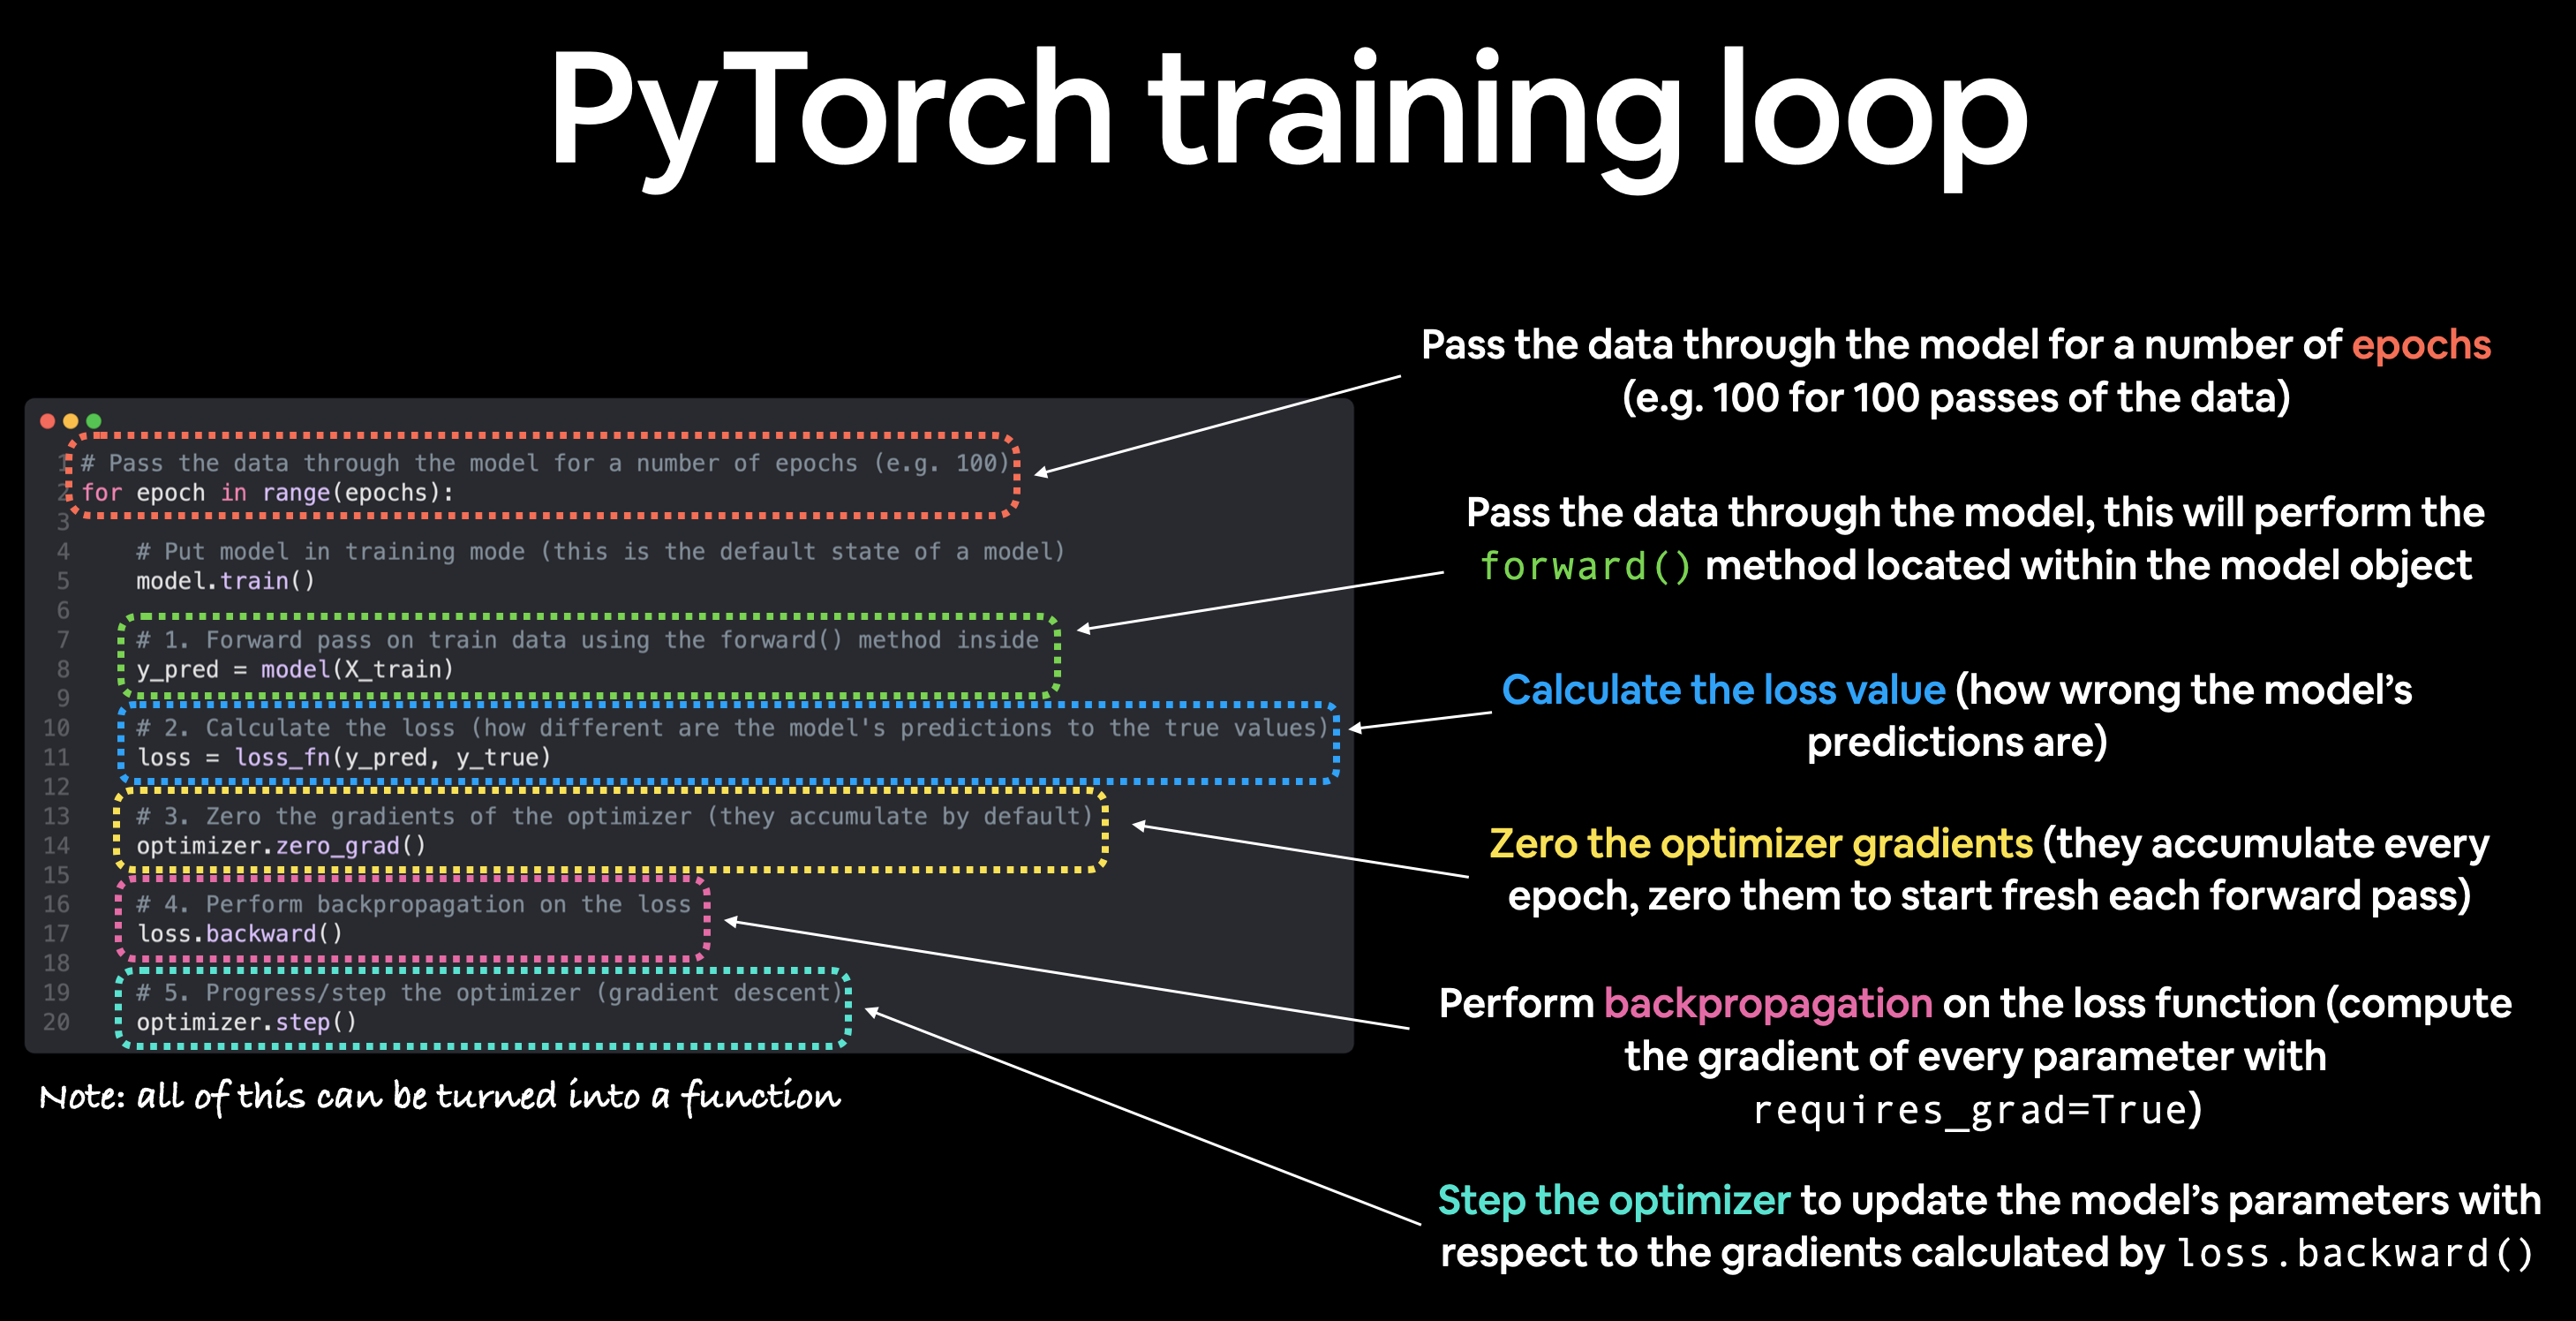